In [ ]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from matplotlib import rcParams

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Loading the dataset
data=pd.read_csv("https://raw.githubusercontent.com/ashaabrizvi/FIFA-20/master/players_20.csv", error_bad_lines=False,parse_dates=True)

In [ ]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [ ]:
data.shape

(18278, 104)

In [ ]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [ ]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [ ]:
# removing unnecesory columns
data.drop(['player_url','sofifa_id','long_name','team_jersey_number','loaned_from','nation_jersey_number', \
           'player_tags','nation_position','team_jersey_number','player_positions',\
          'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes'], axis = 1, inplace = True)



In [ ]:
data.head()

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,RW,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,LW,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,CAM,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,GK,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,Normal,Yes,184500000.0,LW,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
data.shape

(18278, 90)

In [ ]:
data.isna().sum()

short_name                        0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
team_position                   240
joined                         1288
contract_valid_until            240
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                      

In [ ]:
data['age'].value_counts().head()

22    1446
21    1375
23    1358
27    1324
25    1319
Name: age, dtype: int64

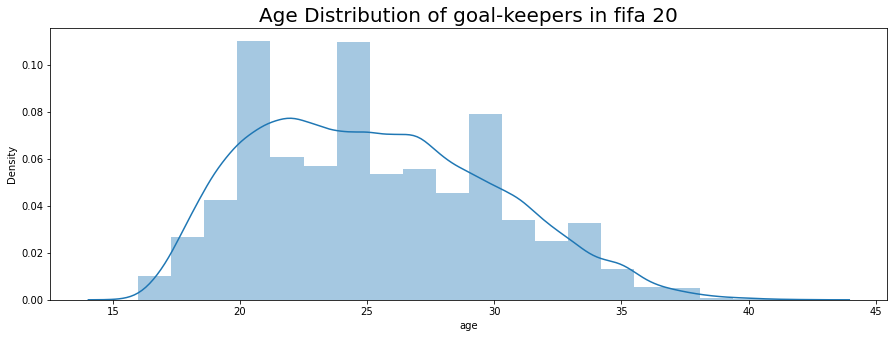

In [ ]:

plt.figure(figsize=(15,5))
plt.title('Age Distribution of goal-keepers in fifa 20', fontsize=20)
sns.distplot(a=data['age'], kde=True, bins=20)

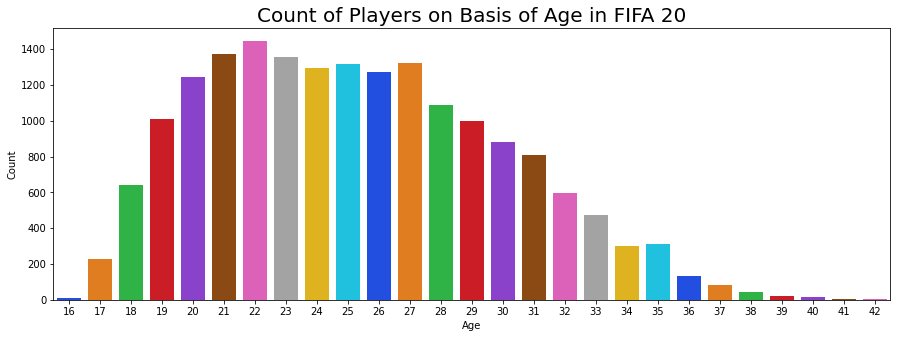

In [ ]:
plt.figure(figsize= (15,5))

ax = sns.countplot(x='age', data=data, palette='bright')
ax.set_title(label='Count of Players on Basis of Age in FIFA 20', fontsize=20)

ax.set_xlabel(xlabel='Age', fontsize=10)
ax.set_ylabel(ylabel='Count', fontsize=10)

plt.show()

In [ ]:
data['nationality'].value_counts().head()

England      1667
Germany      1216
Spain        1035
France        984
Argentina     886
Name: nationality, dtype: int64

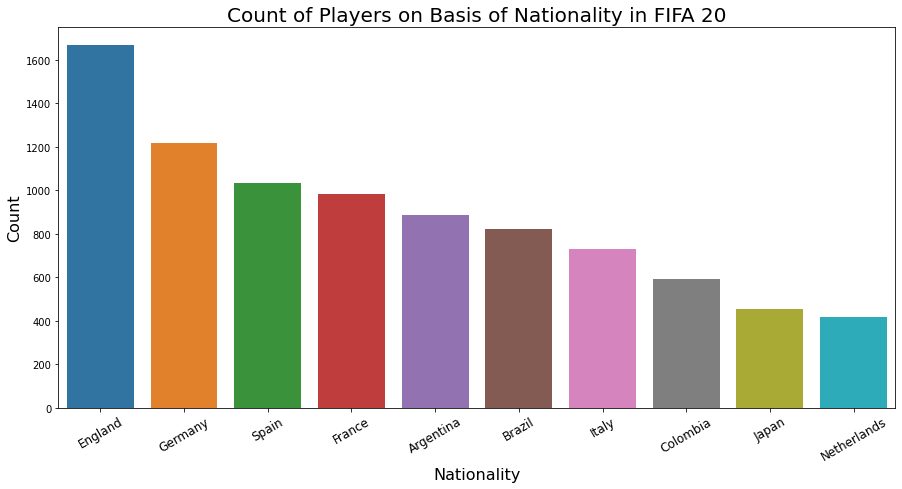

In [ ]:
plt.figure(figsize= (15, 7))

ax = sns.countplot(x='nationality', data=data, palette=None, order=data.nationality.value_counts().iloc[:10].index)
ax.set_title(label='Count of Players on Basis of Nationality in FIFA 20', fontsize=20)

ax.set_xlabel(xlabel='Nationality', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

In [ ]:
data['height_cm'].value_counts()

180    1468
178    1213
185    1193
183    1160
175     990
188     904
182     833
184     820
186     774
177     722
181     704
187     682
176     669
179     641
190     585
173     567
174     483
191     464
170     455
189     439
172     412
193     316
192     290
171     262
168     195
194     173
169     149
196     139
195     136
167     102
165      68
166      60
197      51
198      35
163      29
164      21
199      14
162      12
201      11
200      10
203       6
161       5
202       4
158       3
159       3
160       3
156       1
157       1
205       1
Name: height_cm, dtype: int64

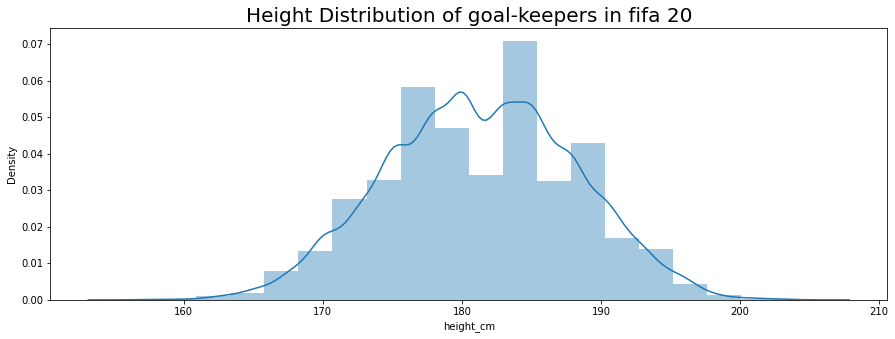

In [ ]:


plt.figure(figsize=(15,5))
plt.title('Height Distribution of goal-keepers in fifa 20', fontsize=20)
sns.distplot(a=data['height_cm'], kde=True, bins=20)



In [ ]:
df = data.filter(['club','overall'])

Text(0, 0.5, 'Number of players')

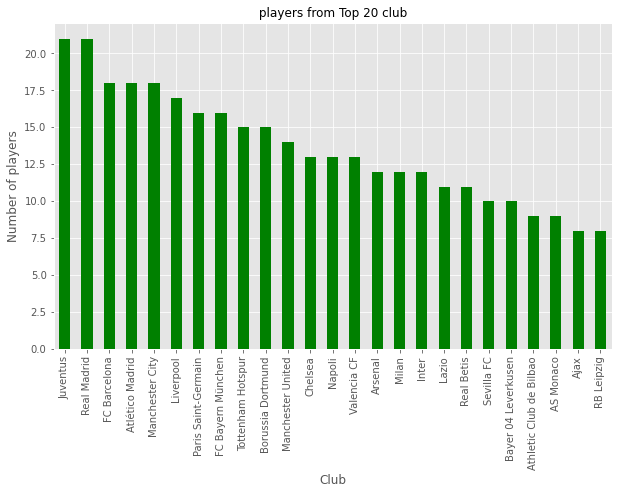

In [ ]:


df = df[df.overall>=80]
df =df['club'].value_counts()
df=df.head(25)
rcParams['figure.figsize']= 10,6
with plt.style.context(('ggplot')):df.plot(kind='bar',color = 'green')
plt.title(' players from Top 20 club ')
plt.xlabel('Club')
plt.ylabel('Number of players')



In [ ]:
data['preferred_foot'].value_counts()

Right    13960
Left      4318
Name: preferred_foot, dtype: int64

Text(0.5, 1.0, 'Count of Players on Basis of preferred_foot in FIFA 20')

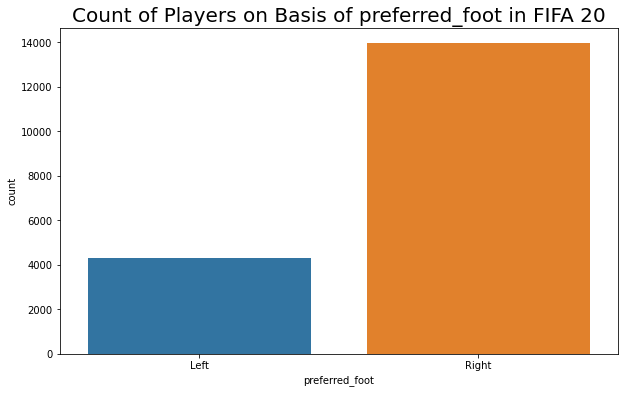

In [ ]:
ax = sns.countplot(x='preferred_foot', data=data, palette=None)
ax.set_title(label='Count of Players on Basis of preferred_foot in FIFA 20', fontsize=20)

Goal keepers


In [ ]:
data['team_position'].isnull().sum()

240

In [ ]:
data['team_position'].fillna(data['team_position'].mode()[0],inplace=True)

In [ ]:
data['team_position'].isnull().sum()

0

In [ ]:
# For goalkeepers
data_gk=data.loc[data['team_position'] == "GK"]
data_gk.head(2)

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,GK,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,M. ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,GK,2014-07-01,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_oth=data.loc[data['team_position']!="GK"]
data_oth.head(2)

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,RW,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,LW,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


In [ ]:
data_gk_null=data_gk.isnull().sum()
data_gk_null

short_name                      0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
release_clause_eur             41
team_position                   0
joined                         41
contract_valid_until            0
pace                          662
shooting                      662
passing                       662
dribbling                     662
defending                     662
physic                        662
gk_diving                       0
gk_handling   

In [ ]:


data_gk=data_gk.drop(['dob','pace','shooting','passing','dribbling','defending','physic','player_traits',\
                      'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm',\
                      'cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb'],axis=1)
data_gk.head(2)



,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,joined,contract_valid_until,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,GK,2014-07-16,2023.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,GK,2014-07-01,2022.0,88.0,85.0,88.0,90.0,45.0,88.0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10


In [ ]:
data_gk.shape

(662, 56)

In [ ]:
data_gk['overall'].value_counts().head()

66    52
67    49
73    44
68    42
70    42
Name: overall, dtype: int64

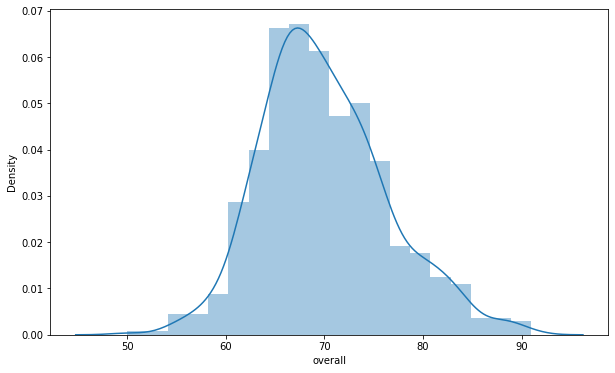

In [ ]:
sns.distplot(a=data_gk['overall'], kde=True, bins=20)

In [ ]:
data_gk['wage_eur'].value_counts().head()

1000    153
2000    104
3000     73
4000     43
5000     37
Name: wage_eur, dtype: int64

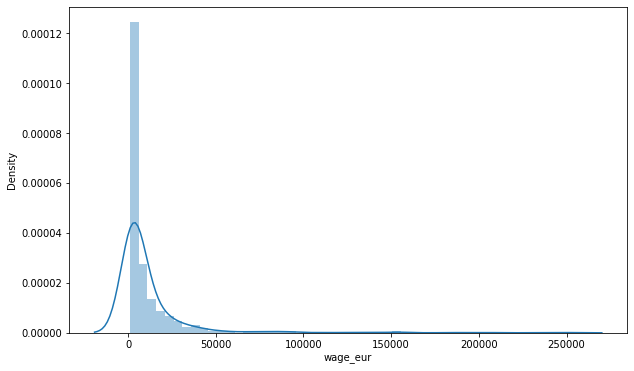

In [ ]:
sns.distplot(a=data_gk['wage_eur'], kde=True)

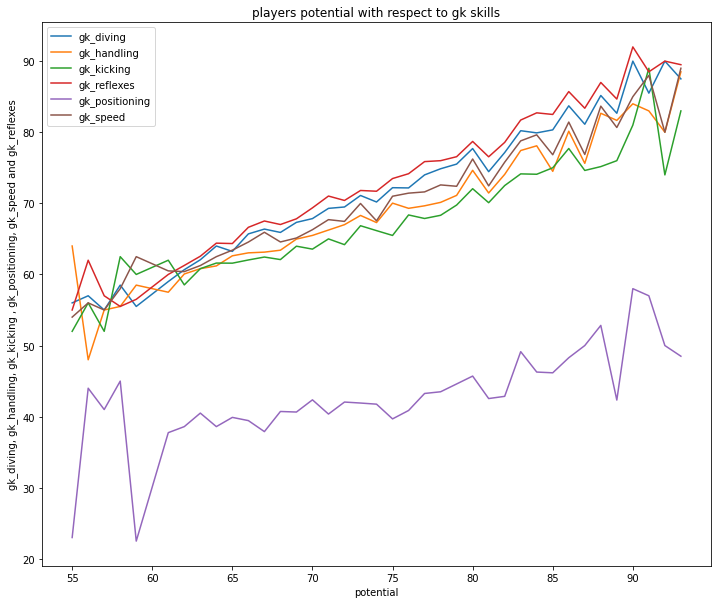

In [ ]:


rcParams['figure.figsize']= 12,10
sns.lineplot('potential' ,'gk_diving', data=data_gk,legend='brief',ci=None).set_title('players potential with respect to gk skills')
sns.lineplot('potential','gk_handling',data=data_gk,legend='brief',ci=None)
sns.lineplot('potential','gk_kicking',data=data_gk,legend='brief',ci=None)
sns.lineplot('potential','gk_reflexes',data=data_gk,legend='brief',ci=None)
sns.lineplot('potential','gk_speed',data=data_gk,legend='brief',ci=None)
sns.lineplot('potential','gk_positioning',data=data_gk,legend='brief',ci=None).set_ylabel('gk_diving, gk_handling, gk_kicking , gk_positioning, gk_speed and gk_reflexes')
plt.legend(['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_positioning','gk_speed'])
plt.show()



Other players

In [ ]:
# For other players
data_oth=data.loc[data['team_position'] != "GK"]
data_oth.head(2)

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,RW,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,LW,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


In [ ]:

data_oth.isnull().sum()

short_name                        0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1257
team_position                     0
joined                         1247
contract_valid_until            240
pace                           1374
shooting                       1374
passing                        1374
dribbling                      1374
defending                      1374
physic                      

In [ ]:
data_oth=data_oth.drop(['dob','work_rate','real_face','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed',\
                     'gk_positioning','player_traits'],axis=1)
data_oth.head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Messi,195800000.0,RW,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,C. Ronaldo,96500000.0,LW,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,Neymar,195200000.0,CAM,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,Normal,184500000.0,LW,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,Normal,166500000.0,RCM,2015-08-30,2023.0,76.0,86.0,92.0,86.0,61.0,78.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [ ]:
data1=data_oth
data1
data1.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Messi,195800000.0,RW,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,C. Ronaldo,96500000.0,LW,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,Neymar,195200000.0,CAM,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,Normal,184500000.0,LW,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,Normal,166500000.0,RCM,2015-08-30,2023.0,76.0,86.0,92.0,86.0,61.0,78.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [ ]:
data1['joined'].fillna(0,inplace=True)
data1['contract_valid_until'].fillna(0,inplace = True)

In [ ]:
data1['joined'] = pd.to_datetime(data1['joined'],format = '%Y-%m-%d',errors = 'coerce')

In [ ]:
data1['contract_valid_until'] = data1['contract_valid_until'].astype(int)
data1['contract_valid_until'].head()

0    2021
1    2022
2    2022
4    2024
5    2023
Name: contract_valid_until, dtype: int64

Analysis



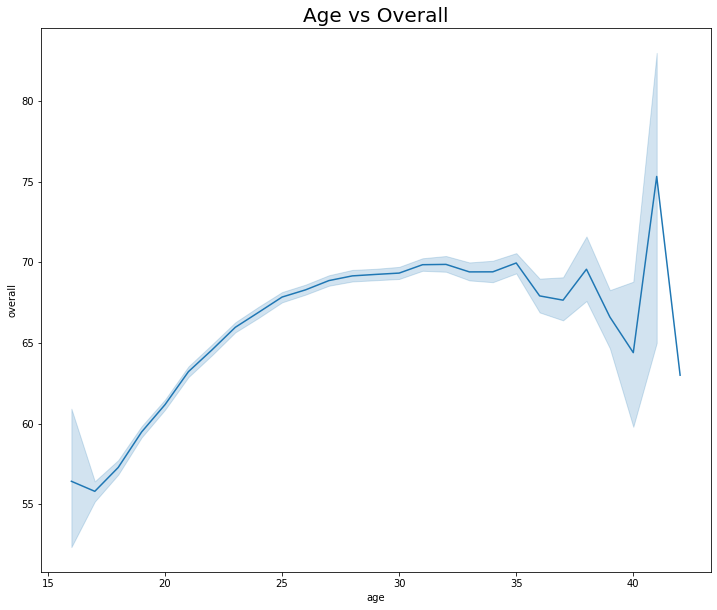

In [ ]:


# Age vs Overall
avp = sns.lineplot(data1['age'], data1['overall'], palette = 'Wistia')
plt.title('Age vs Overall', fontsize = 20)

plt.show()



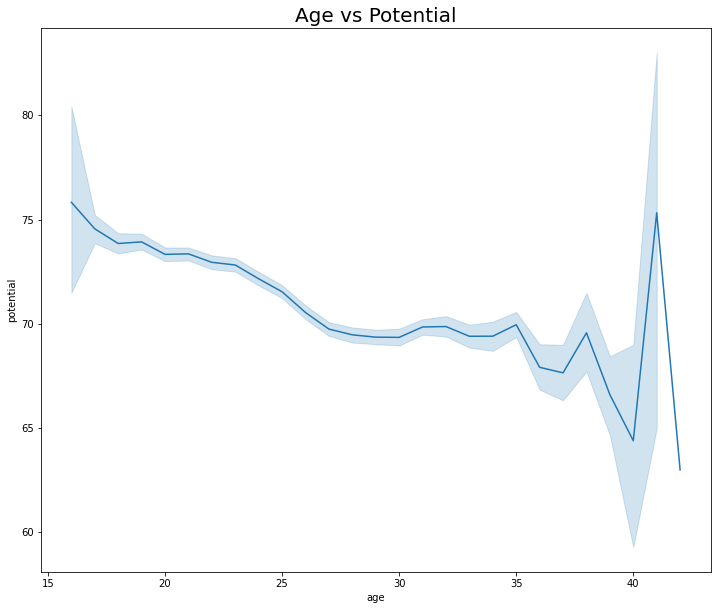

In [ ]:


# Age vs potential
avp = sns.lineplot(data1['age'], data1['potential'], palette = 'Wistia')
plt.title('Age vs Potential', fontsize = 20)
plt.show()



In [ ]:
data1['wage_eur'].head()

0    565000
1    405000
2    290000
4    470000
5    370000
Name: wage_eur, dtype: int64

In [ ]:
data1['value_eur'].head()

0     95500000
1     58500000
2    105500000
4     90000000
5     90000000
Name: value_eur, dtype: int64

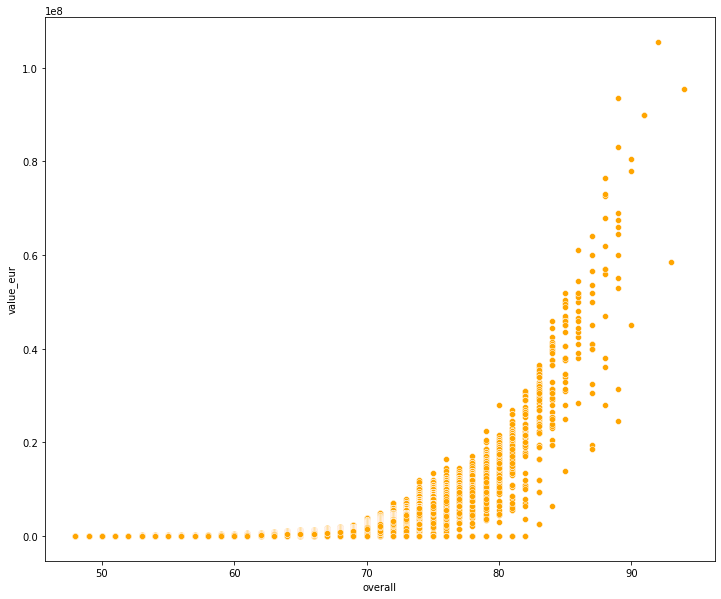

In [ ]:


sns.scatterplot(x= 'overall' ,y='value_eur', data=data1, color = 'orange')



In [ ]:
data1['release_clause_eur'].head()

0    195800000.0
1     96500000.0
2    195200000.0
4    184500000.0
5    166500000.0
Name: release_clause_eur, dtype: float64

In [ ]:
data1['release_clause_eur'].isnull().sum()

1257

In [ ]:
data1['release_clause_eur']=data1['release_clause_eur'].fillna((data1['release_clause_eur'].mean()))

In [ ]:
data1['release_clause_eur'] =data1['release_clause_eur'].astype(int)

In [ ]:
data_val=data1.loc[:,['value_eur','release_clause_eur']]
data_val.head(10)

,value_eur,release_clause_eur
0,95500000,195800000
1,58500000,96500000
2,105500000,195200000
4,90000000,184500000
5,90000000,166500000
7,78000000,150200000
8,45000000,92300000
9,80500000,148900000
10,93500000,191700000
11,67500000,119800000


Text(0, 0.5, 'value in euros billions')

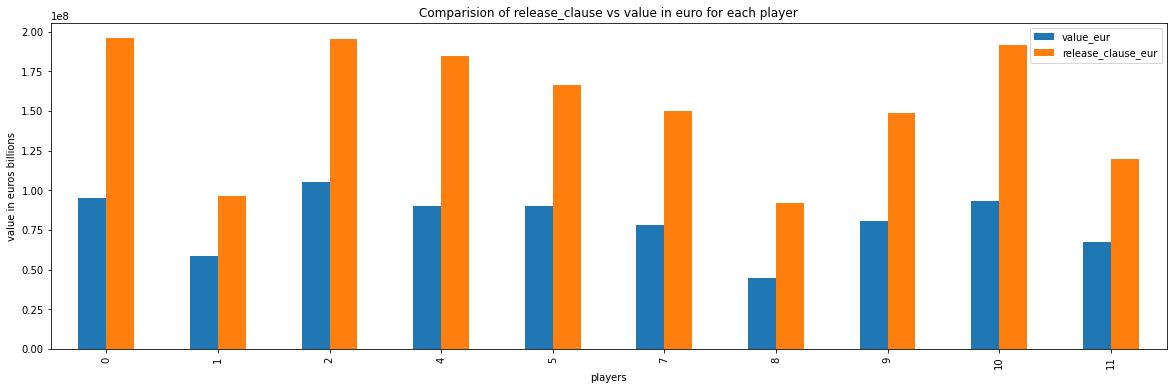

In [ ]:


data_val.head(10).plot(kind = 'bar', figsize=(20,6))
plt.title('Comparision of release_clause vs value in euro for each player')
plt.xlabel('players')
plt.ylabel('value in euros billions')

In [ ]:
data1['international_reputation'].value_counts()

1    16215
2     1082
3      271
4       43
5        5
Name: international_reputation, dtype: int64

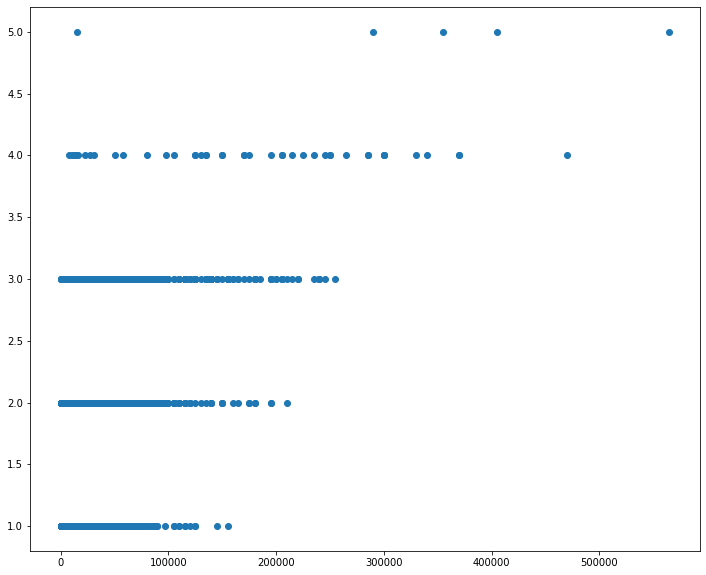

In [ ]:


x=data1['wage_eur']
y=data1['international_reputation']
plt.scatter(x, y)
plt.show()



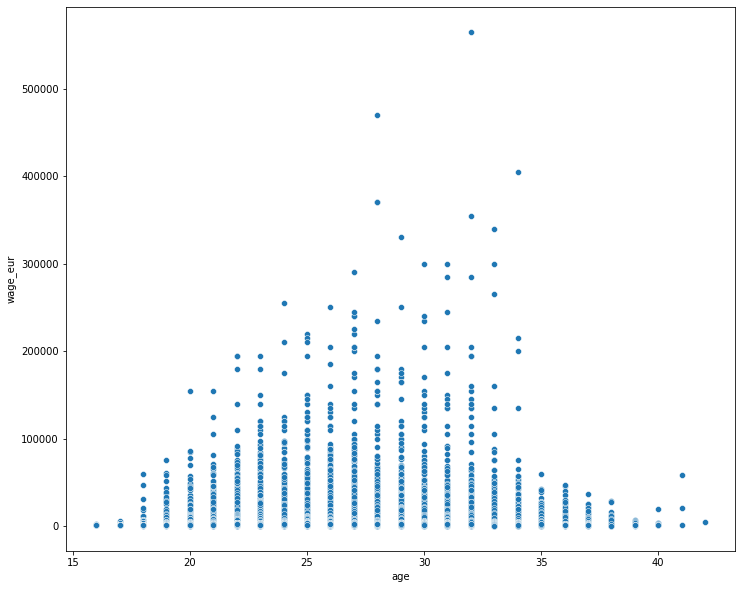

In [ ]:
sns.scatterplot(x= 'age' ,y='wage_eur', data=data1,hue=None)

In [ ]:
data1['pace'] = data1['pace'].fillna((data1['pace'].mean()))
data1['shooting'] = data1['shooting'].fillna((data1['shooting'].mean()))
data1['passing'] = data1['passing'].fillna((data1['passing'].mean()))
data1['dribbling'] = data1['dribbling'].fillna((data1['dribbling'].mean()))
data1['defending'] = data1['defending'].fillna((data1['defending'].mean()))
data1['physic'] = data1['physic'].fillna((data1['physic'].mean()))

In [ ]:
df = data1.loc[:,['short_name','defending','physic','pace','shooting','dribbling','passing']]
df.head()

,short_name,defending,physic,pace,shooting,dribbling,passing
0,L. Messi,39.0,66.0,87.0,92.0,96.0,92.0
1,Cristiano Ronaldo,35.0,78.0,90.0,93.0,89.0,82.0
2,Neymar Jr,32.0,58.0,91.0,85.0,95.0,87.0
4,E. Hazard,35.0,66.0,91.0,83.0,94.0,86.0
5,K. De Bruyne,61.0,78.0,76.0,86.0,86.0,92.0


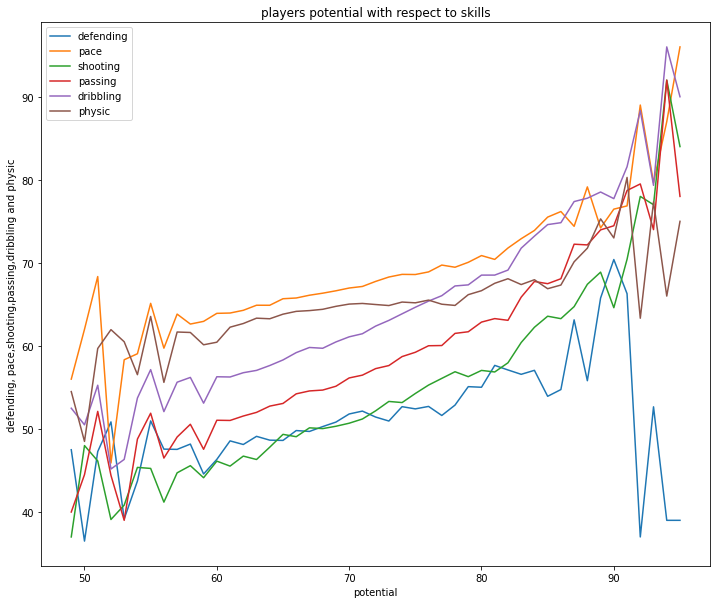

In [ ]:


rcParams['figure.figsize']= 12,10
sns.lineplot('potential' ,'defending', data=data1,legend='brief',ci=None).set_title('players potential with respect to skills')
sns.lineplot('potential','pace',data=data1,legend='brief',ci=None)
sns.lineplot('potential','shooting',data=data1,legend='brief',ci=None)
sns.lineplot('potential','passing',data=data1,legend='brief',ci=None)
sns.lineplot('potential','dribbling',data=data1,legend='brief',ci=None)
sns.lineplot('potential','physic',data=data1,legend='brief',ci=None).set_ylabel('defending, pace,shooting,passing,dribbling and physic')
plt.legend(['defending','pace','shooting','passing','dribbling','physic'])
plt.show()

In [ ]:


def label_pos (row):
    if(row.team_position == "RB" or row.team_position == "CB" or row.team_position == "LB" or
       row.team_position == "LWB" or row.team_position == "RCB"or row.team_position == "RWB" or
       row.team_position == "LCB"):
        return 'Defender'
    if(row.team_position == "RW" or row.team_position == "CF" or row.team_position == "LW" or
       row.team_position == "ST" or row.team_position == "RS"or row.team_position == "LS"
       or row.team_position == "LF"or row.team_position == "RF"):
        return 'Forward'
    if(row.team_position == "RM" or row.team_position == "CM" or row.team_position == "LM"
       or row.team_position == "CAM" or row.team_position == "LDM" or row.team_position == "RDM"
      or row.team_position == "LAM"or row.team_position == "RAM" or row.team_position == "CDM"
       or row.team_position == "RCM"or row.team_position == "LCM"):
        return 'MidFielder'
    if (row.team_position == "SUB"):
        return 'Substitute'
    if (row.team_position == "RES"):
        return 'Reserve'
    return "other"

data1['field_position'] = data1.apply (lambda row: label_pos(row), axis=1)



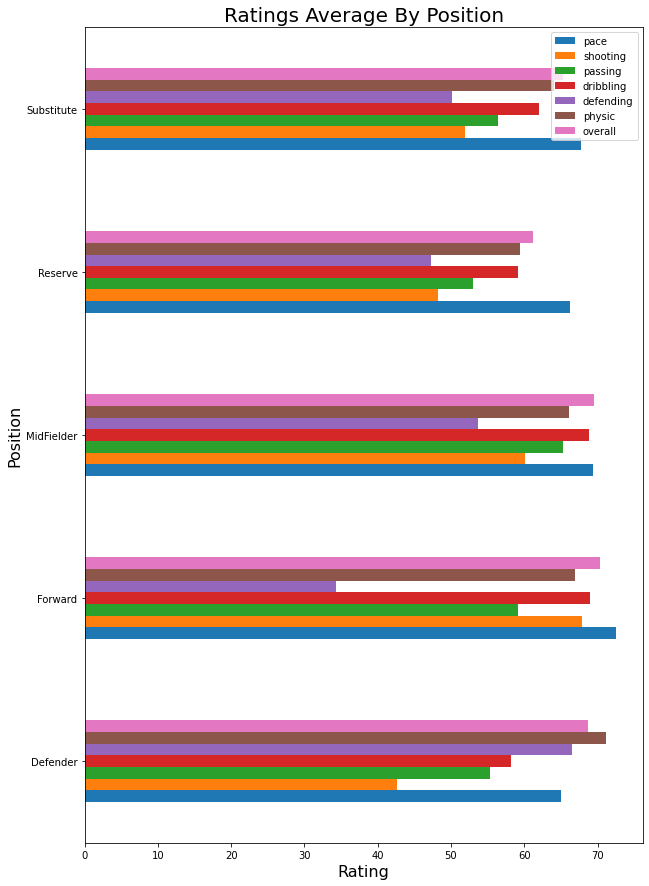

In [ ]:
ratingsByPositions = data1.groupby([data1['field_position']]).mean()
ratingsByPositions = ratingsByPositions
ratingsByPositions = ratingsByPositions[['pace','shooting','passing','dribbling','defending','physic','overall']]
ratingsByPositions.plot(kind='barh', figsize=(10,15))

plt.title('Ratings Average By Position',fontsize=20)
plt.xlabel('Rating',fontsize=16)
plt.ylabel('Position',fontsize=16);

Text(0, 0.5, '')

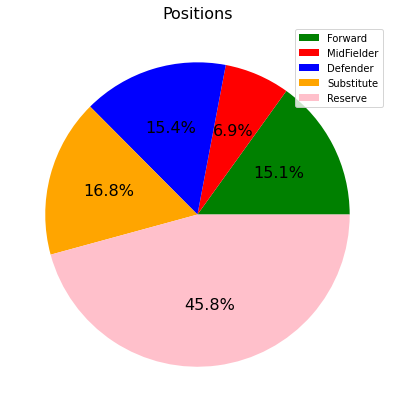

In [ ]:
by_pos = data1.groupby(data1['field_position']).count().age

by_pos.plot(kind='pie',figsize=(7,7), colors=['green','red','blue','orange','pink','grey'], labels=None, autopct='%1.1f%%', fontsize=16)

plt.legend(labels=data1['field_position'].unique())
plt.title('Positions', fontsize=16)
plt.ylabel('')

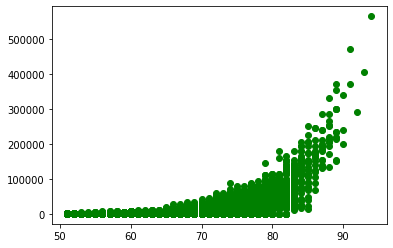

In [ ]:


%matplotlib inline
y=data1[data1["overall"]>50]
plt.scatter(y["overall"],y["wage_eur"],color="green")



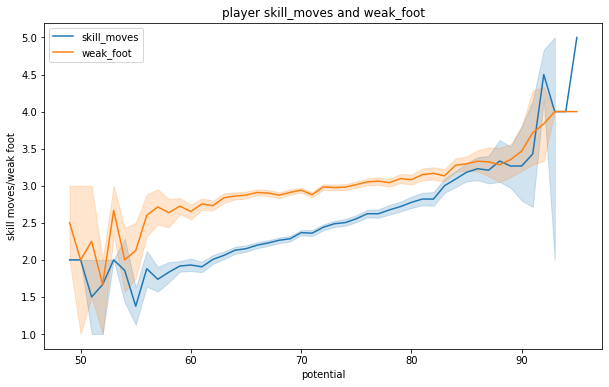

In [ ]:


rcParams['figure.figsize']= 10,6
sns.lineplot('potential' ,'skill_moves', data=data1,legend='brief').set_title('player skill_moves and weak_foot')
sns.lineplot('potential','weak_foot',data=data1,legend='brief').set_ylabel('skill moves/weak foot')
plt.legend(['skill_moves','weak_foot'])
plt.show()



Text(0.5, 0, 'skill move and weak foot')

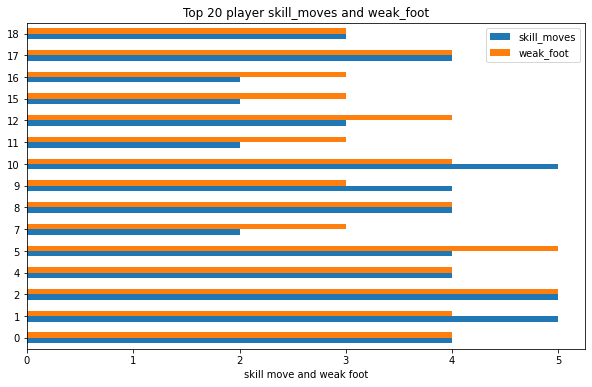

In [ ]:
data1_sw = data1.loc[:,['skill_moves','weak_foot']]
data1_sw = data1_sw.head(15)
data1_sw.plot(kind = 'barh', figsize=(10,6) )
plt.title('Top 20 player skill_moves and weak_foot')
plt.xlabel('skill move and weak foot')

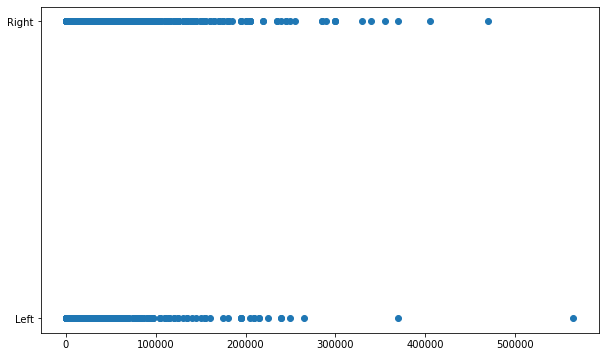

In [ ]:
x=data1['wage_eur']
y=data1['preferred_foot']
plt.scatter(x, y)
plt.show()

Text(0.5, 1.0, 'Bodytype vs wage in eur')

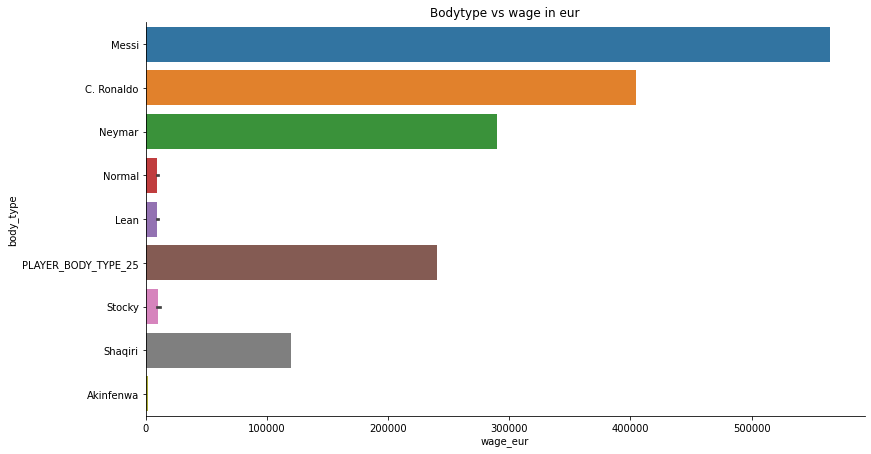

In [ ]:


sns.catplot(y="body_type",
            x="wage_eur",data=data1,
           height=6,kind="bar",aspect=2)
plt.title("Bodytype vs wage in eur")



In [ ]:


columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']



In [ ]:
for col in columns:
     data1[col]=data1[col].str.split('+',n=1,expand = True)[0]
data1[['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']]=data1[columns]
data1[columns] = data1[columns].fillna(0)
data1.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,field_position
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Messi,195800000,RW,2004-07-01,2021,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,Forward
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,C. Ronaldo,96500000,LW,2018-07-10,2022,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,Forward
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,Neymar,195200000,CAM,2017-08-03,2022,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61,MidFielder
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,Normal,184500000,LW,2019-07-01,2024,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61,Forward
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,Normal,166500000,RCM,2015-08-30,2023,76.0,86.0,92.0,86.0,61.0,78.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,MidFielder


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
enc=LabelEncoder()
data1.loc[:,['nationality','club','body_type','team_position','field_position','preferred_foot']]=data1.loc[:,['nationality','club','body_type','team_position','field_position','preferred_foot']].apply(enc.fit_transform)
data1.head(2)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,field_position
0,L. Messi,32,170,72,5,224,94,94,95500000,565000,0,5,4,4,3,195800000,24,2004-07-01,2021,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,1
1,Cristiano Ronaldo,34,187,83,120,350,93,93,58500000,405000,1,5,4,5,1,96500000,13,2018-07-10,2022,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,1


In [ ]:
data1['overall'].min()

48

In [ ]:
data1.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'body_type',
       'release_clause_eur', 'team_position', 'joined', 'contract_valid_until',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'men

In [ ]:
data1=data1[['short_name','age','overall','value_eur','international_reputation','skill_moves',\
             'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',\
             'field_position']]

In [ ]:
data1 = data1[data1.overall > 50]

In [ ]:
names = data1.short_name.tolist()

In [ ]:
data1 = data1.drop(['short_name'], axis = 1) # drop the short_name column
data1.head()

,age,overall,value_eur,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic,field_position
0,32,94,95500000,5,4,87.0,92.0,92.0,96.0,39.0,66.0,1
1,34,93,58500000,5,5,90.0,93.0,82.0,89.0,35.0,78.0,1
2,27,92,105500000,5,5,91.0,85.0,87.0,95.0,32.0,58.0,2
4,28,91,90000000,4,4,91.0,83.0,86.0,94.0,35.0,66.0,1
5,28,91,90000000,4,4,76.0,86.0,92.0,86.0,61.0,78.0,2


In [ ]:
sns.pairplot(data1,hue ='international_reputation' )

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
from sklearn import preprocessing
x = data1.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [ ]:
#K means to determine K
distortions = []
K=range(1,10)
for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x,kmeanModel.cluster_centers_,'euclidean'),axis=1))/x.shape[0])

In [ ]:
distortions

[2797872.2865698286,
 2038233.8920029204,
 1232624.4241174567,
 1009721.067463341,
 841464.2044218152,
 710105.8498517604,
 610539.6146490528,
 549902.2255651498,
 539182.7725697114]

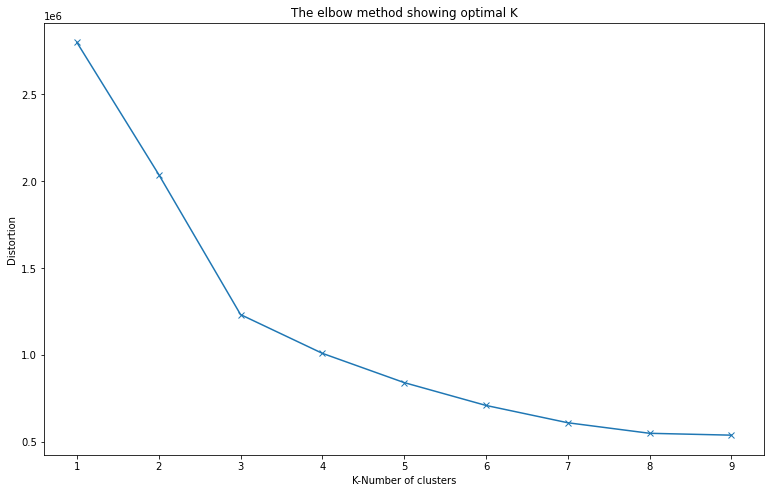

In [ ]:
#Plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xticks(range(1,25))
ax.set_xlabel('K-Number of clusters')
ax.set_ylabel('Distortion')
ax.set_title('The elbow method showing optimal K')
ax.plot(K,distortions,marker='x')
plt.show()

In [ ]:


km =KMeans(n_clusters = 3)
km
y_predicted=km.fit_predict(data1[['age','overall','value_eur','field_position','international_reputation',\
                                 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',\
                                 'skill_moves']])
y_predicted



array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
km.cluster_centers_

array([[2.51131867e+01, 6.48440034e+01, 1.05600246e+06, 2.76616722e+00,
        1.03826944e+00, 6.71776459e+01, 5.09287925e+01, 5.59057172e+01,
        6.12850099e+01, 5.07248133e+01, 6.42625626e+01, 2.33904132e+00],
       [2.63250000e+01, 8.47200000e+01, 4.00025000e+07, 1.73000000e+00,
        2.66000000e+00, 7.67970090e+01, 7.22579830e+01, 7.64423378e+01,
        8.07403158e+01, 5.93405350e+01, 7.22437668e+01, 3.48500000e+00],
       [2.61303132e+01, 7.68713647e+01, 1.04161074e+07, 2.26789709e+00,
        1.47595078e+00, 7.17958764e+01, 6.33881147e+01, 6.81230499e+01,
        7.27919170e+01, 5.90154391e+01, 7.06550897e+01, 3.06375839e+00]])

In [ ]:
X = data1.values

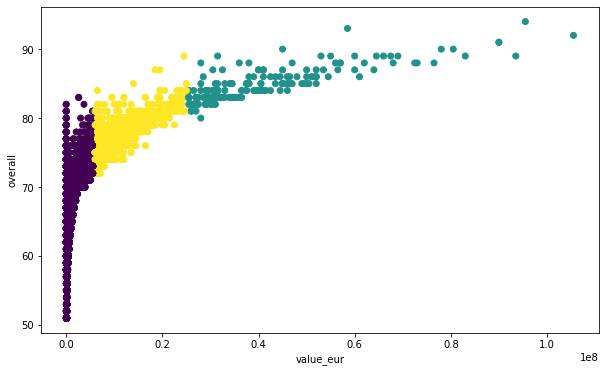

In [ ]:


plt.scatter(X[:, 2], X[:, 1],c=y_predicted.astype(np.float))
plt.xlabel('value_eur')
plt.ylabel('overall')

plt.show()

